In [1]:
#Import Pacakges
import pandas as pd
from pandas.tseries.offsets import *
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

from math import ceil
import numpy as np
#from dstools import data_tools

import matplotlib.pylab as plt
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 8, 6

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# LR Model

In [7]:
data_dept = pd.read_csv('processed_data_week.csv')
X = data_dept.drop('Target_Variable',1)
Y = data_dept['Target_Variable']

In [ ]:
#Build the baseline model of LR

param_grid_lr = {'C':[10**i for i in range(-3, 3)], 
                 'penalty':['l1', 'l2']}
kfolds = KFold(X.shape[0], n_folds = 6)
lr_grid_search = GridSearchCV(LogisticRegression(), param_grid_lr, cv = kfolds, scoring = 'accuracy') 
lr_grid_search.fit(X, Y)

best_1 = lr_grid_search.best_score_
print(best_1)

#without week: 0.60
#with week 0.61

In [9]:
lr_grid_search.best_estimator_
#Base line model info: C = 10, penalty = 'l1'

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
#Build up a pineline for feature engineering
#Try to scalarize / stardarize the data
steps = [('scaler',StandardScaler()),
         ('lr',LogisticRegression())]

pipeline = Pipeline(steps)
kfolds = KFold(X.shape[0], n_folds = 6)
parameters_2 = dict(lr__C = [10**i for i in range(-3, 3)],
                  lr__penalty = ['l1', 'l2'])

lr_grid_search_2 = GridSearchCV(pipeline, param_grid = parameters_2, cv = kfolds, scoring = 'accuracy')
lr_grid_search_2.fit(X, Y)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=58736, n_folds=6, shuffle=False, random_state=None),
       error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'lr__penalty': ['l1', 'l2'], 'lr__C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [5]:
best_2 = lr_grid_search_2.best_score_
print(best_2) #0.6104

0.61040928902206482

In [6]:
lr_grid_search_2.best_estimator_ #C = 1, penalty = 'l2'

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [ ]:
#Polynomial Feature
steps_3 = [('polyfeat', PolynomialFeatures()),
         ('scaler', StandardScaler()),
         ('lr', LogisticRegression())]

pipeline_3 = Pipeline(steps_3)

 
parameters_3 = dict(polyfeat__degree = [1, 2],
                    polyfeat__interaction_only = [True, False],
                    lr__C = [10**i for i in range(-3, 3)],
                    lr__penalty = ['l1', 'l2'])

lr_grid_search_3 = GridSearchCV(pipeline_3, param_grid = parameters_3, cv = kfolds, scoring = 'accuracy')

lr_grid_search_3.fit(X, Y)

best_3 = lr_grid_search_3.best_score_
print(best_3) #Memory failure

In [7]:
#Feature Selection
steps_4 = [('featureSelection',SelectFromModel(LogisticRegression())),
           ('lr',LogisticRegression())]
pipeline_4 = Pipeline(steps_4)

parameters_4 = dict(lr__C = [10**i for i in range(-3, 3)],
                    lr__penalty = ['l1', 'l2'],
                    featureSelection__threshold = [0.2,0.3])
lr_grid_search_4 = GridSearchCV(pipeline_4, param_grid=parameters_4, cv=kfolds,scoring = 'accuracy' )
lr_grid_search_4.fit(X,Y)


GridSearchCV(cv=sklearn.cross_validation.KFold(n=58736, n_folds=6, shuffle=False, random_state=None),
       error_score='raise',
       estimator=Pipeline(steps=[('featureSelection', SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0,...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'lr__penalty': ['l1', 'l2'], 'lr__C': [0.001, 0.01, 0.1, 1, 10, 100], 'featureSelection__threshold': [0.2, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [95]:
lr_grid_search_4.best_estimator_  # C = 1, penalty = 'l2'

Pipeline(steps=[('featureSelection', SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0,...ty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [8]:
best_4 = lr_grid_search_4.best_score_
print(best_4) #0.605

0.605114410242


In [4]:
# Best model is the LR with C = 1 and 'l2' penalty and using scalarized data
# To plot the ROC curve of the best model:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25)
scaler = StandardScaler().fit(X_train)
X_train_scalered = scaler.transform(X_train)                
X_test_scalered = scaler.transform(X_test)

model = LogisticRegression(C=1, penalty='l2')
model.fit(X_train_scalered, Y_train)

Y_test_probability_1 = model.predict_proba(X_test_scalered)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_test_probability_1)

auc = np.mean(cross_val_score(model, scaler.transform(X), Y, scoring="roc_auc",cv = 10))
accuracy = np.mean(cross_val_score(model, scaler.transform(X), Y, scoring="accuracy",cv = 10))

In [5]:
print(accuracy) # 0.612

0.612009976694


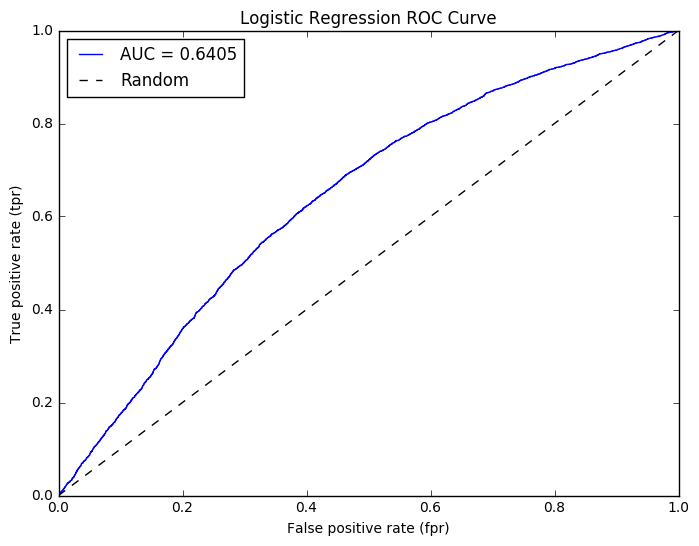

In [68]:
plt.plot(fpr, tpr, label="AUC = %.4f" %auc)
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.title("Logistic Regression ROC Curve")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.legend(loc=2)

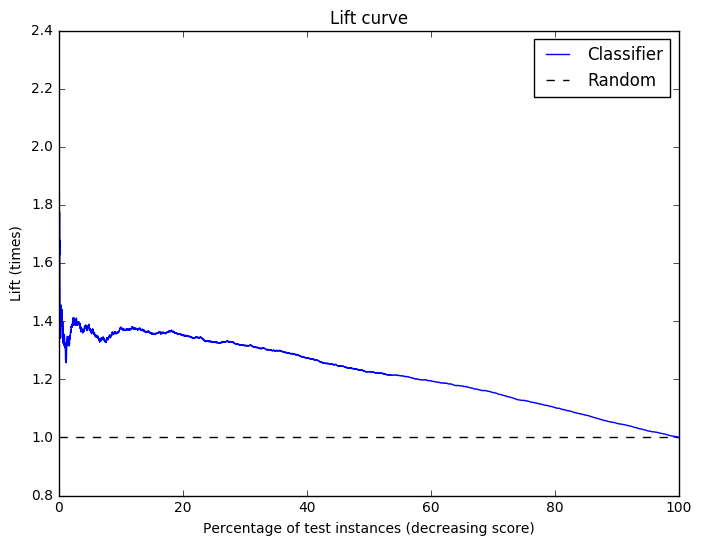

In [21]:
#Lift Curve

Y_test_predicted = model.predict(X_test_scalered)

# Sort these predictions, probabilities, and the true value in descending order of probability
order = np.argsort(Y_test_probability_1)[::-1]
Y_test_predicted_sorted = Y_test_predicted[order]
Y_test_probability_1_sorted = Y_test_probability_1[order]
Y_test_sorted = np.array(Y_test)[order]

# Go record-by-record and build the cumulative response curve
x_cumulative = []
y_cumulative = []
total_test_positives = np.sum(Y_test)
for i in range(1, len(Y_test_probability_1_sorted)+1):
    x_cumulative.append(i)
    y_cumulative.append(np.sum(Y_test_sorted[0:i]) / float(total_test_positives))

# Rescale
x_cumulative = np.array(x_cumulative)/float(np.max(x_cumulative)) * 100
y_cumulative = np.array(y_cumulative) * 100

x_lift = x_cumulative
y_lift = y_cumulative/x_lift

plt.plot(x_lift, y_lift, label="Classifier")
plt.plot([0,100], [1,1], 'k--', label="Random")
plt.xlabel("Percentage of test instances (decreasing score)")
plt.ylabel("Lift (times)")
plt.title("Lift curve")
plt.legend()
plt.show()

In [93]:
#learning Curve

training_size = np.arange(0.01,1,0.01)
aucs = []

for s in training_size:
    X_part_train = X_train.sample(frac = s)
    Y_part_train = Y_train[Y_train.index.isin(X_part_train.index)]
   
    scaler = StandardScaler().fit(X_part_train)
    X_train_scalered = scaler.transform(X_part_train)                
    X_test_scalered = scaler.transform(X_test)
    
    model = LogisticRegression(C=1, penalty='l2')
    model.fit(X_train_scalered, Y_part_train)
    
    aucs.append(metrics.accuracy_score(Y_test,model.predict(X_test_scalered)))

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


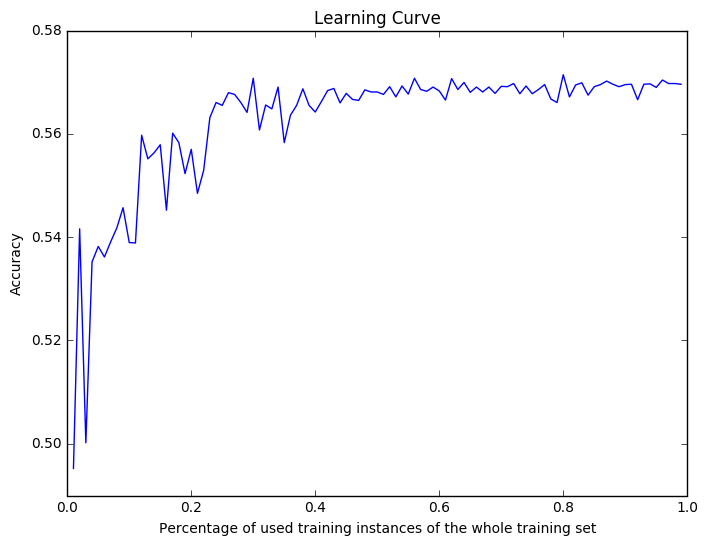

In [94]:
plt.plot(training_size,aucs)
plt.xlabel("Percentage of used training instances of the whole training set")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()